In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv_url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094'

In [ ]:
df = pd.read_csv(csv_url)

In [ ]:
Rows,Columns = df.shape
print(f'There are {Rows} rows and {Columns} columns')

There are 550068 rows and 10 columns


In [ ]:
df.groupby(['Gender'])['Purchase'].nunique()

,Purchase
Gender,
F,14704
M,17547


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
age_counts =df['Age'].value_counts().sort_values(ascending=False)
age_counts



,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


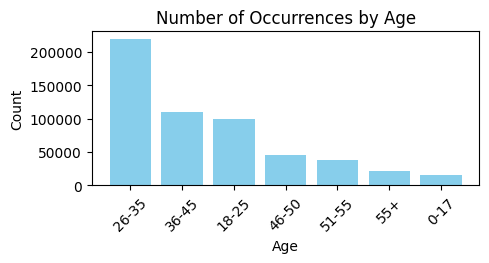

In [ ]:
# Plot the graph
plt.figure(figsize=(5, 2))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of Occurrences by Age')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define bins and labels
bins = [0, 4000, 8000, 12000, 16000, 20000, 24000, float('inf')]
labels = ['0-4k', '4k-8k', '8k-12k', '12k-16k', '16k-20k', '20k-24k', '24k+']

# Create a new category column
df['purchase_Category'] = pd.cut(df['Purchase'], bins=bins, labels=labels)

print(df['purchase_Category'].head(10))

0     8k-12k
1    12k-16k
2       0-4k
3       0-4k
4      4k-8k
5    12k-16k
6    16k-20k
7    12k-16k
8    12k-16k
9      4k-8k
Name: purchase_Category, dtype: category
Categories (7, object): ['0-4k' < '4k-8k' < '8k-12k' < '12k-16k' < '16k-20k' < '20k-24k' < '24k+']


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Category,purchase_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8k-12k,8k-12k
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,12k-16k,12k-16k
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,0-4k,0-4k
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,0-4k,0-4k
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,4k-8k,4k-8k


In [ ]:
purchase_count_cat = df['purchase_Category'].value_counts().sort_values(ascending=False)
purchase_count_cat = purchase_count_cat.reset_index()
purchase_count_cat.columns = ['purchase_Category', 'No. of Purchases']
print(purchase_count_cat)

  purchase_Category  No. of Purchases
0             4k-8k            194738
1            8k-12k            141236
2           12k-16k             79251
3              0-4k             73555
4           16k-20k             48597
5           20k-24k             12691
6              24k+                 0


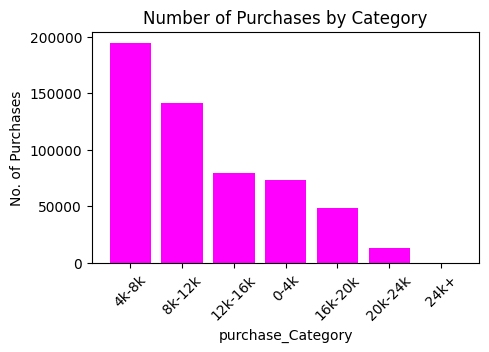

In [ ]:
# Plot the graph
plt.figure(figsize=(5, 3))
plt.bar(purchase_count_cat['purchase_Category'], purchase_count_cat['No. of Purchases'], color='magenta')
plt.xlabel('purchase_Category')
plt.ylabel('No. of Purchases')
plt.title('Number of Purchases by Category')
plt.xticks(rotation=45)
plt.show()

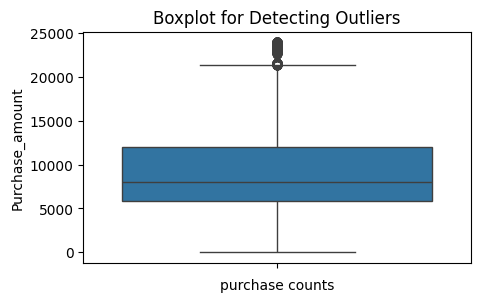

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df['Purchase'])
plt.ylabel('Purchase_amount')
plt.xlabel('purchase counts')
plt.title('Boxplot for Detecting Outliers')
plt.show()

In [ ]:

# Function to calculate outlier range
def calculate_outlier_range(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


purchase_outlier_range = calculate_outlier_range(df['Purchase'])


print(f"Outlier range for Purchase: {purchase_outlier_range}")

Outlier range for Purchase: (-3523.5, 21400.5)


In [ ]:

count = sum(amount > 21400.5 for amount in df['Purchase'])

print(f"Number of values greater than {21400.5}: {count}")

Number of values greater than 21400.5: 2677


In [ ]:
unique_values = df.apply(lambda col: sorted(col.unique()))
print(unique_values)

User_ID                       [1000001, 1000002, 1000003, 1000004, 1000005, ...
Product_ID                    [P00000142, P00000242, P00000342, P00000442, P...
Gender                                                                   [F, M]
Age                              [0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+]
Occupation                    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
City_Category                                                         [A, B, C]
Stay_In_Current_City_Years                                     [0, 1, 2, 3, 4+]
Marital_Status                                                           [0, 1]
Product_Category              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Purchase                      [12, 13, 14, 24, 25, 26, 36, 37, 38, 48, 49, 5...
Category                       [0-4k, 12k-16k, 16k-20k, 20k-24k, 4k-8k, 8k-12k]
purchase_Category              [0-4k, 12k-16k, 16k-20k, 20k-24k, 4k-8k, 8k-12k]
dtype: object


In [ ]:
top_10_product_sold = df['Product_ID'].value_counts().head(10)
print(top_10_product_sold)

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
Name: count, dtype: int64


Gender
M    414259
F    135809
Name: count, dtype: int64


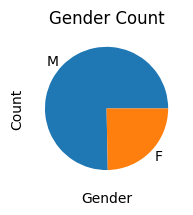

In [ ]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Plotting the bar graph
plt.figure(figsize=(4, 2))
gender_counts.plot(kind='pie', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
plt.xticks(rotation=0)
plt.show()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64


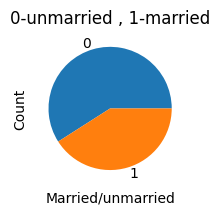

In [ ]:

marrital_counts = df['Marital_Status'].value_counts()
print(marrital_counts)

# Plotting the bar graph
plt.figure(figsize=(4, 2))
marrital_counts.plot(kind='pie', color=['blue', 'pink'])
plt.xlabel('Married/unmarried')
plt.ylabel('Count')
plt.title('0-unmarried , 1-married')
plt.xticks(rotation=0)
plt.show()

City_Category
A    147720
C    171175
B    231173
Name: count, dtype: int64


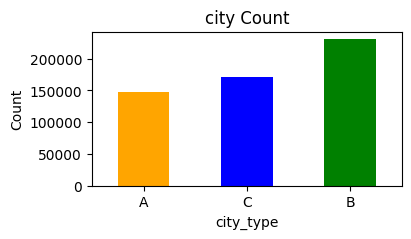

In [ ]:
# Count the occurrences of each gender
city_counts = df['City_Category'].value_counts().sort_values()
print(city_counts)

# Plotting the bar graph
plt.figure(figsize=(4, 2))
city_counts.plot(kind='bar', color=['orange', 'blue', 'green'])
plt.xlabel('city_type')
plt.ylabel('Count')
plt.title('city Count')
plt.xticks(rotation=0)
plt.show()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


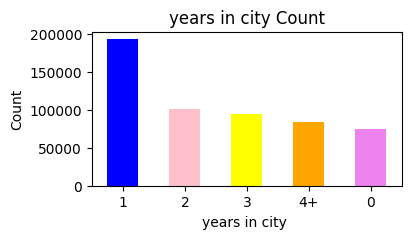

In [ ]:
stay_counts = df['Stay_In_Current_City_Years'].value_counts()
print(stay_counts)

# Plotting the bar graph
plt.figure(figsize=(4, 2))
stay_counts.plot(kind='bar', color=['blue', 'pink','yellow','orange','violet'])
plt.xlabel('years in city ')
plt.ylabel('Count')
plt.title('years in city Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df.groupby(['Gender','User_ID'])['Purchase'].count()

Gender  User_ID
F       1000001     35
        1000006     47
        1000010    223
        1000011     70
        1000016     22
                  ... 
M       1006030     59
        1006032     55
        1006033     36
        1006034     12
        1006040    180
Name: Purchase, Length: 5891, dtype: int64

In [ ]:
gender_sales = df.groupby(['Gender','Marital_Status'])['Purchase'].sum()

print(gender_sales)

Gender  Marital_Status
F       0                  684154127
        1                  502078515
M       0                 2324773320
        1                 1584806780
Name: Purchase, dtype: int64


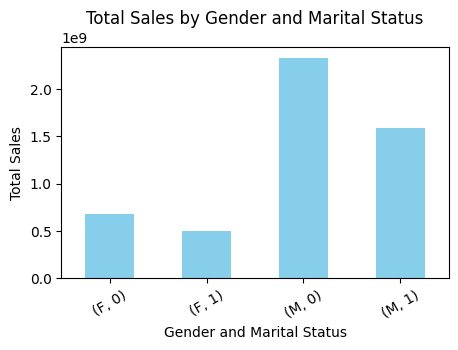

In [ ]:
plt.figure(figsize=(5, 3))
gender_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Gender and Marital Status')
plt.ylabel('Total Sales')
plt.title('Total Sales by Gender and Marital Status')
plt.xticks(rotation = 30)
plt.show()

In [ ]:


city_cat_sales = df.groupby(['Gender','City_Category'])['Purchase'].sum()
city_cat_sales

Gender  City_Category
F       A                 306329915
        B                 493617008
        C                 386285719
M       A                1010141746
        B                1621916597
        C                1277521757
Name: Purchase, dtype: int64

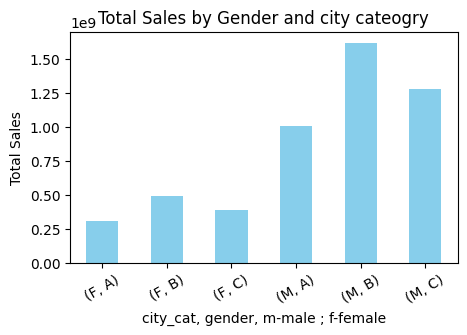

In [ ]:
plt.figure(figsize=(5, 3))
city_cat_sales.plot(kind='bar', color='skyblue')
plt.xlabel('city_cat, gender, m-male ; f-female')
plt.ylabel('Total Sales')
plt.title('Total Sales by Gender and city cateogry')
plt.xticks(rotation = 30)
plt.show()

In [ ]:


age_vs_city = df.groupby(['Age','Stay_In_Current_City_Years'])['User_ID'].count().sort_values()
age_vs_city.tail(4)

Age    Stay_In_Current_City_Years
36-45  1                             37074
26-35  3                             39478
       2                             39854
       1                             77469
Name: User_ID, dtype: int64

<Figure size 1000x600 with 0 Axes>

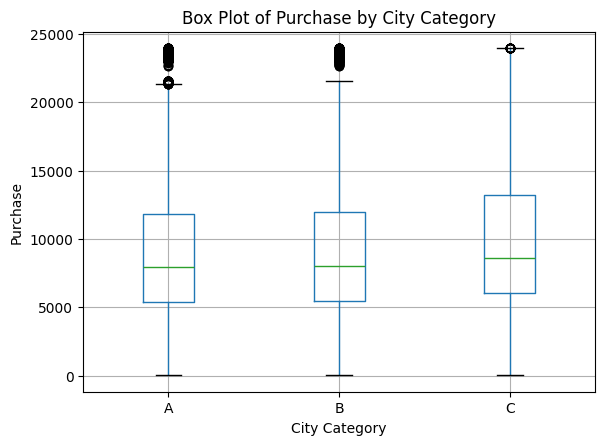

In [ ]:
# Box plot for City_Category vs Purchase
plt.figure(figsize=(10, 6))
df.boxplot(column='Purchase', by='City_Category')
plt.xlabel('City Category')
plt.ylabel('Purchase')
plt.title('Box Plot of Purchase by City Category')
plt.suptitle('')
plt.show()

In [ ]:
df.info()
#df.groupby(['City_Category'])['Purchase'].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User_ID         5891 non-null   int64 
 1   Purchase        5891 non-null   int64 
 2   Gender          5891 non-null   object
 3   Age             5891 non-null   object
 4   Marital_Status  5891 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 230.2+ KB


In [ ]:
# Calculate the average purchase amount by gender
gender_avg_purchase = df.groupby('Gender')['Purchase'].mean().round(2)
print("Average Purchase by Gender:")
print(gender_avg_purchase)

Average Purchase by Gender:
Gender
F    8734.57
M    9437.53
Name: Purchase, dtype: float64


In [ ]:
# Average purchase by gender and age
gender_age_avg_purchase = df.groupby(['Gender', 'Age'])['Purchase'].mean().round(2)

print("\nAverage Purchase by Gender and Age:")
print(gender_age_avg_purchase)


Average Purchase by Gender and Age:
Gender  Age  
F       0-17     8338.77
        18-25    8343.18
        26-35    8728.25
        36-45    8959.84
        46-50    8842.10
        51-55    9042.45
        55+      9007.04
M       0-17     9235.17
        18-25    9440.94
        26-35    9410.34
        36-45    9453.19
        46-50    9357.47
        51-55    9705.09
        55+      9438.20
Name: Purchase, dtype: float64


In [ ]:
# Average purchase by gender and occupation
gender_occupation_avg_purchase = df.groupby(['Gender', 'Occupation'])['User_ID'].count()
print("\nAverage Purchase by Gender and Occupation:")
print(gender_occupation_avg_purchase)


Average Purchase by Gender and Occupation:
Gender  Occupation
F       0             18112
        1             17984
        2              8629
        3              7919
        4             17836
        5              2220
        6              8160
        7             10028
        8               361
        9              5843
        10             4003
        11             1500
        12             3469
        13             1498
        14             6763
        15             2390
        16             4107
        17             3929
        18              230
        19             2017
        20             8811
M       0             51526
        1             29442
        2             17959
        3              9731
        4             54472
        5              9957
        6             12195
        7             49105
        8              1185
        9               448
        10             8927
        11            10086
        12   

In [ ]:
# Average purchase by gender and occupation
gender_occupation_avg_purchase = df.groupby(['Gender', 'Occupation'])['Purchase'].mean().tail(5)
print("\nAverage Purchase by Gender and Occupation:")
print(gender_occupation_avg_purchase)


Average Purchase by Gender and Occupation:
Gender  Occupation
M       16            9477.371520
        17            9851.727696
        18            9137.093398
        19            8797.868870
        20            9015.452547
Name: Purchase, dtype: float64


In [ ]:
# Crosstab for Gender and Occupation in percentages
crosstab_gender_occupation = pd.crosstab(df['Gender'], df['Occupation'], normalize='index') * 100
print("\nCrosstab for Gender and Occupation (in percentages):")
print(crosstab_gender_occupation)


Crosstab for Gender and Occupation (in percentages):
Occupation         0          1         2         3          4         5   \
Gender                                                                      
F           13.336377  13.242127  6.353776  5.830983  13.133150  1.634649   
M           12.438112   7.107148  4.335211  2.349014  13.149262  2.403569   

Occupation        6          7         8         9   ...        11        12  \
Gender                                               ...                       
F           6.008438   7.383899  0.265814  4.302366  ...  1.104492  2.554323   
M           2.943811  11.853695  0.286053  0.108145  ...  2.434709  6.689052   

Occupation       13        14        15        16        17        18  \
Gender                                                                  
F           1.10302  4.979788  1.759824  3.024100  2.893034  0.169355   
M           1.50389  4.959699  2.359635  5.133021  8.717735  1.542996   

Occupation        19   

In [ ]:
# Average purchase by gender and marital status
gender_marital_avg_purchase = df.groupby(['Gender', 'Marital_Status'])['Purchase'].mean().unstack()
print("\nAverage Purchase by Gender and Marital Status:")
print(gender_marital_avg_purchase)


Average Purchase by Gender and Marital Status:
Marital_Status            0            1
Gender                                  
F               8679.845815  8810.249789
M               9453.756740  9413.817605


In [ ]:
# Average purchase by gender and stay in current city years
gender_stay_avg_purchase = df.groupby(['Gender', 'Stay_In_Current_City_Years'])['Purchase'].mean()
print("\nAverage Purchase by Gender and Stay In Current City Years:")
print(gender_stay_avg_purchase)


Average Purchase by Gender and Stay In Current City Years:
Gender  Stay_In_Current_City_Years
F       0                             8606.040497
        1                             8775.052244
        2                             8740.516357
        3                             8695.236582
        4+                            8784.883738
M       0                             9350.908869
        1                             9421.145380
        2                             9502.486091
        3                             9491.916315
        4+                            9413.589778
Name: Purchase, dtype: float64


In [ ]:
import scipy.stats as stats

In [ ]:
# Function to calculate confidence interval
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

# Calculate confidence intervals for male and female customers
male_purchase = df[df['Gender'] == 'M']['Purchase']
female_purchase = df[df['Gender'] == 'F']['Purchase']

male_mean, male_ci_lower, male_ci_upper = calculate_confidence_interval(male_purchase)
female_mean, female_ci_lower, female_ci_upper = calculate_confidence_interval(female_purchase)

print("Confidence Interval for Male Purchase:")
print(f"Mean: {male_mean}, CI: ({male_ci_lower}, {male_ci_upper})")

print("\nConfidence Interval for Female Purchase:")
print(f"Mean: {female_mean}, CI: ({female_ci_lower}, {female_ci_upper})")

Confidence Interval for Male Purchase:
Mean: 9437.526040472265, CI: (9422.019402055814, 9453.032678888716)

Confidence Interval for Female Purchase:
Mean: 8734.565765155476, CI: (8709.21132117373, 8759.92020913722)


In [ ]:
# Check if confidence intervals are overlapping
overlapping_gender = not (male_ci_upper < female_ci_lower or female_ci_upper < male_ci_lower)
print("\nAre confidence intervals of average male and female spending overlapping?")
print(overlapping_gender)

# Interpretation and recommendations
if overlapping_gender:
    print("The confidence intervals of average male and female spending are overlapping. This suggests that there is no significant difference in spending between males and females. Walmart can leverage this by creating gender-neutral marketing campaigns and promotions.")
else:
    print("The confidence intervals of average male and female spending are not overlapping. This suggests that there is a significant difference in spending between males and females. Walmart can leverage this by creating targeted marketing campaigns and promotions for each gender.")


Are confidence intervals of average male and female spending overlapping?
False
The confidence intervals of average male and female spending are not overlapping. This suggests that there is a significant difference in spending between males and females. Walmart can leverage this by creating targeted marketing campaigns and promotions for each gender.


In [ ]:
# Calculate confidence intervals for married and unmarried customers
married_purchase = df[df['Marital_Status'] == 1]['Purchase']
unmarried_purchase = df[df['Marital_Status'] == 0]['Purchase']

married_mean, married_ci_lower, married_ci_upper = calculate_confidence_interval(married_purchase)
unmarried_mean, unmarried_ci_lower, unmarried_ci_upper = calculate_confidence_interval(unmarried_purchase)

print("\nConfidence Interval for Married Purchase:")
print(f"Mean: {married_mean}, CI: ({married_ci_lower}, {married_ci_upper})")

print("\nConfidence Interval for Unmarried Purchase:")
print(f"Mean: {unmarried_mean}, CI: ({unmarried_ci_lower}, {unmarried_ci_upper})")

# Check if confidence intervals are overlapping
overlapping_marital = not (married_ci_upper < unmarried_ci_lower or unmarried_ci_upper < married_ci_lower)
print("\nAre confidence intervals of average married and unmarried spending overlapping?")
print(overlapping_marital)

# Interpretation and recommendations
if overlapping_marital:
    print("The confidence intervals of average married and unmarried spending are overlapping. This suggests that there is no significant difference in spending between married and unmarried customers. Walmart can leverage this by creating general promotions that appeal to both groups.")
else:
    print("The confidence intervals of average married and unmarried spending are not overlapping. This suggests that there is a significant difference in spending between married and unmarried customers. Walmart can leverage this by creating targeted promotions for each group.")


Confidence Interval for Married Purchase:
Mean: 9261.174574082374, CI: (9240.460315792989, 9281.888832371758)

Confidence Interval for Unmarried Purchase:
Mean: 9265.907618921507, CI: (9248.616353737028, 9283.198884105985)

Are confidence intervals of average married and unmarried spending overlapping?
True
The confidence intervals of average married and unmarried spending are overlapping. This suggests that there is no significant difference in spending between married and unmarried customers. Walmart can leverage this by creating general promotions that appeal to both groups.


In [ ]:
gender = df.groupby(['User_ID','Gender'])['Purchase'].sum()


In [ ]:
#c

df = df.groupby("User_ID", as_index=False).agg({"Purchase": "sum", "Gender": "first", "Age": "first", "Marital_Status": "first"})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User_ID         5891 non-null   int64 
 1   Purchase        5891 non-null   int64 
 2   Gender          5891 non-null   object
 3   Age             5891 non-null   object
 4   Marital_Status  5891 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 230.2+ KB


In [ ]:
gender_avg_spending = df.groupby("Gender")["Purchase"].mean()
print("Average Purchase Amount by Gender:")
print(gender_avg_spending)

Average Purchase Amount by Gender:
Gender
F    712024.394958
M    925344.402367
Name: Purchase, dtype: float64


In [ ]:
def confidence_interval_z(data, confidence=0.95):
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # Standard deviation with Bessel's correction
    z_value = stats.norm.ppf((1 + confidence) / 2)  # Z-score for the confidence level
    margin = z_value * (std / np.sqrt(len(data)))
    return mean, mean - margin, mean + margin

In [ ]:
# Calculate confidence intervals using Z-score
ci_male = confidence_interval_z(df[df["Gender"] == "M"]["Purchase"])
ci_female = confidence_interval_z(df[df["Gender"] == "F"]["Purchase"])
print("\nConfidence Interval for Male Spending (Z-score):", ci_male)
print("Confidence Interval for Female Spending (Z-score):", ci_female)


Confidence Interval for Male Spending (Z-score): (925344.4023668639, 895618.3794063339, 955070.4253273939)
Confidence Interval for Female Spending (Z-score): (712024.3949579832, 673255.4849374058, 750793.3049785605)


In [ ]:
overlap = (ci_female[2] >= ci_male[1]) and (ci_male[2] >= ci_female[1])
print("\nDo confidence intervals overlap : ", overlap)



Do confidence intervals overlap :  False


In [ ]:
# Results for Married vs Unmarried
group_marital = df.groupby("Marital_Status")["Purchase"].mean()
print("\nAverage Purchase Amount by Marital Status:")
print(group_marital)

ci_married = confidence_interval_z(df[df["Marital_Status"] == 1]["Purchase"])
ci_unmarried = confidence_interval_z(df[df["Marital_Status"] == 0]["Purchase"])
print("Confidence Interval for Married Spending:", ci_married)
print("Confidence Interval for Unmarried Spending:", ci_unmarried)



Average Purchase Amount by Marital Status:
Marital_Status
0    880575.781972
1    843526.796686
Name: Purchase, dtype: float64
Confidence Interval for Married Spending: (843526.7966855295, 806669.5086715257, 880384.0846995333)
Confidence Interval for Unmarried Spending: (880575.7819724905, 848741.7674019644, 912409.7965430166)


In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:

# 5. Results based on Age groups
group_age = df.groupby("Age")["Purchase"].mean()
print("\nAverage Purchase Amount by Age Group:")
print(group_age)

#age26_35 = confidence_interval_z(df[df["Age"] == 26-35]["Purchase"])

#print("Confidence Interval for age 26-35 Spending:", age26_35)



Average Purchase Amount by Age Group:
Age
0-17     618867.811927
18-25    854863.119738
26-35    989659.317097
36-45    879665.710368
46-50    792548.781544
51-55    763200.923077
55+      539697.244624
Name: Purchase, dtype: float64


In [ ]:
group_age = df.groupby("Age")["Purchase"].mean()

# Calculate the confidence interval for each age group
confidence_intervals = {}
for age in group_age.index:
    purchases = df[df["Age"] == age]["Purchase"]
    mean = purchases.mean()
    sem = stats.sem(purchases)  # Standard error of the mean
    ci = stats.t.interval(0.95, len(purchases)-1, loc=mean, scale=sem)  # Confidence interval
    confidence_intervals[age] = ci

print("\nAverage Purchase Amount by Age Group:")
print(group_age)
print("\n95% Confidence Intervals for Average Purchase Amount by Age Group:")
for age in confidence_intervals:
    print(f"Age {age}: {confidence_intervals[age]}")


Average Purchase Amount by Age Group:
Age
0-17     618867.811927
18-25    854863.119738
26-35    989659.317097
36-45    879665.710368
46-50    792548.781544
51-55    763200.923077
55+      539697.244624
Name: Purchase, dtype: float64

95% Confidence Intervals for Average Purchase Amount by Age Group:
Age 0-17: (527152.6234073392, 710583.0004458718)
Age 18-25: (801573.3611914959, 908152.87828465)
Age 26-35: (945008.907026595, 1034309.7271672676)
Age 36-45: (823290.3176389545, 936041.1030979777)
Age 46-50: (713326.1728976379, 871771.3901908743)
Age 51-55: (692214.7359532815, 834187.1102005647)
Age 55+: (476744.04356350156, 602650.4456838103)


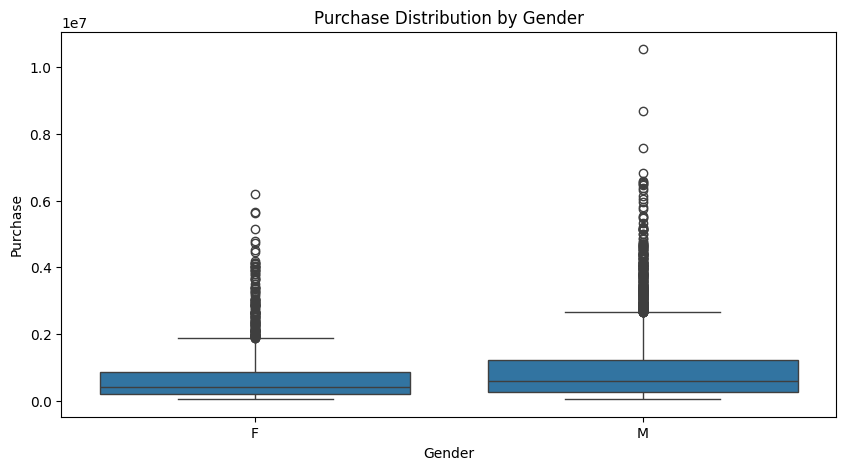

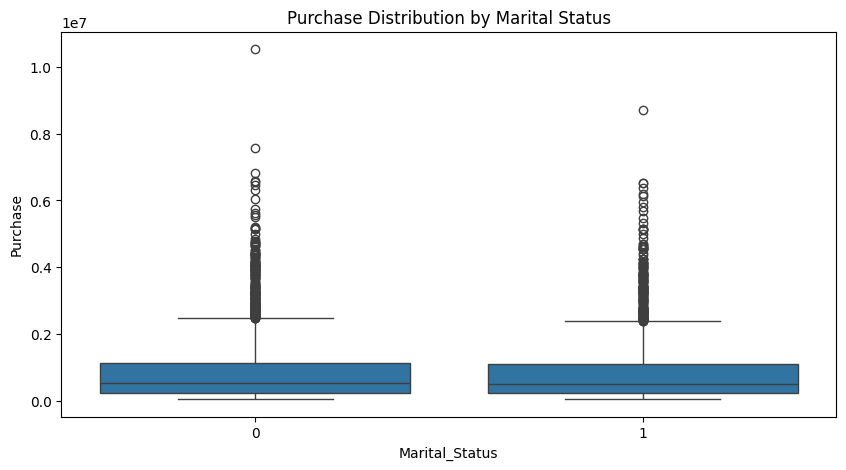

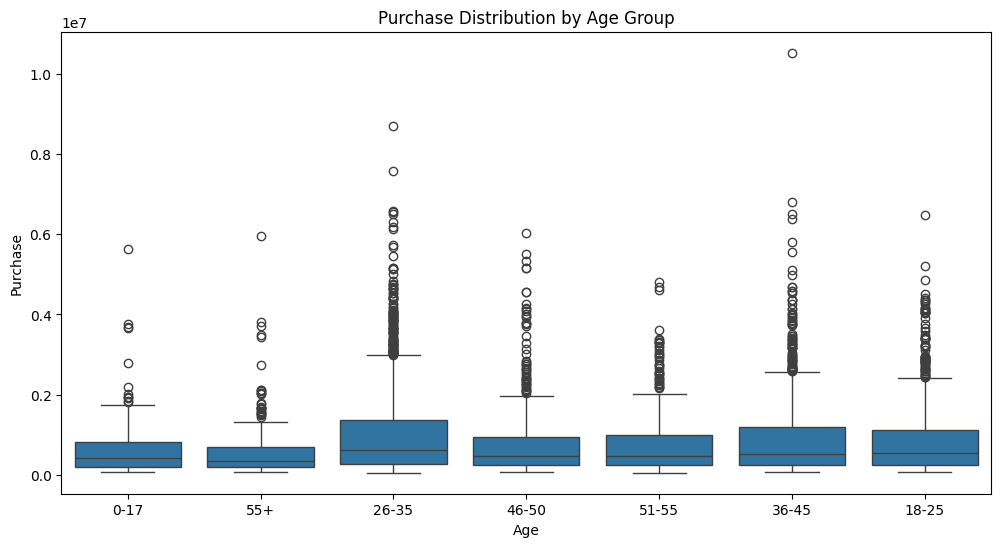

In [ ]:
# 6. Final insights with visualization
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender", y="Purchase", data=df)
plt.title("Purchase Distribution by Gender")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="Marital_Status", y="Purchase", data=df)
plt.title("Purchase Distribution by Marital Status")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Age", y="Purchase", data=df)
plt.title("Purchase Distribution by Age Group")
plt.show()

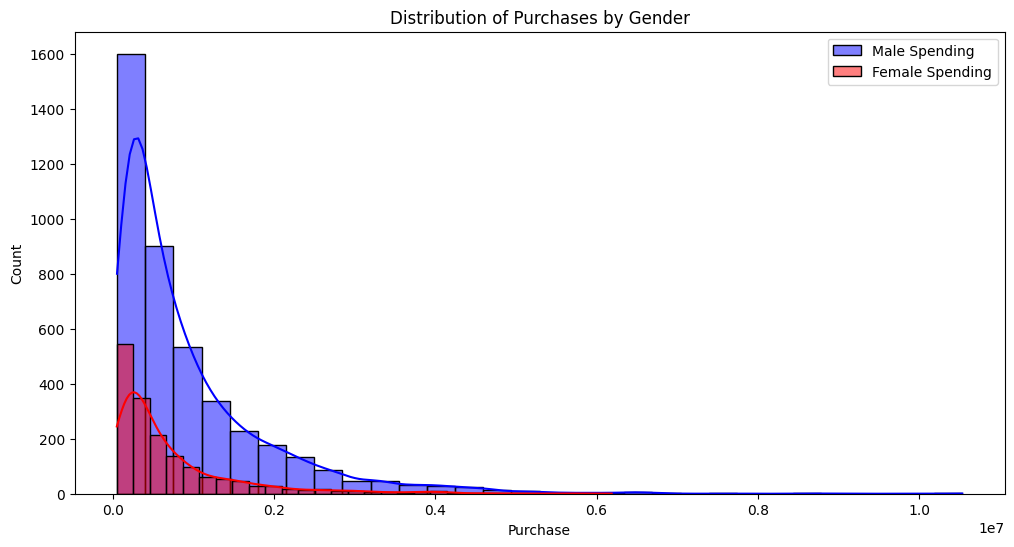

In [ ]:
# Additional Visualization - Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df[df["Gender"] == "M"]["Purchase"], bins=30, kde=True, color='blue', label="Male Spending")
sns.histplot(df[df["Gender"] == "F"]["Purchase"], bins=30, kde=True, color='red', label="Female Spending")
plt.title("Distribution of Purchases by Gender")
plt.legend()
plt.show()
